In [31]:
import pandas as pd  # Data handling  
import numpy as np  # Numerical operations  
import matplotlib.pyplot as plt  # Data visualization  
import seaborn as sns  # Advanced visualizations  
from sklearn.model_selection import train_test_split  # Data splitting  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler  # Encoding & scaling  
from sklearn.ensemble import RandomForestClassifier  # Model training  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Evaluation  
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [32]:
# Load the cleaned dataset from the directory
data_cleaned = pd.read_csv('../data/cleaned/data_cleaned.csv')

# Verify the data is loaded successfully
print(data_cleaned.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [33]:
# Select numerical columns
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                      'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

In [34]:
print(data_cleaned.head())

   Administrative  Administrative_Duration  Informational  \
0       -0.702302                -0.460019      -0.398824   
1       -0.702302                -0.460019      -0.398824   
2       -0.702302                -0.460019      -0.398824   
3       -0.702302                -0.460019      -0.398824   
4       -0.702302                -0.460019      -0.398824   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.246257       -0.696218                -0.628793   
1               -0.246257       -0.673793                -0.595451   
2               -0.246257       -0.696218                -0.628793   
3               -0.246257       -0.673793                -0.627404   
4               -0.246257       -0.494387                -0.301889   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     3.969402   3.434394   -0.318962    -0.31024   Feb                 1   
1    -0.450137   1.268054   -0.318962    -0.31024   Feb   

In [35]:
# Perform one-hot encoding for VisitorType
data_cleaned = pd.get_dummies(data_cleaned, columns=['VisitorType', 'Month'], drop_first=True)

In [36]:
data_cleaned['Weekend'] = data_cleaned['Weekend'].astype(int)  # True -> 1, False -> 0
data_cleaned['Revenue'] = data_cleaned['Revenue'].astype(int)  # True -> 1, False -> 0

In [37]:
# Verify the data is loaded successfully
print(data_cleaned.head())

   Administrative  Administrative_Duration  Informational  \
0       -0.702302                -0.460019      -0.398824   
1       -0.702302                -0.460019      -0.398824   
2       -0.702302                -0.460019      -0.398824   
3       -0.702302                -0.460019      -0.398824   
4       -0.702302                -0.460019      -0.398824   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.246257       -0.696218                -0.628793   
1               -0.246257       -0.673793                -0.595451   
2               -0.246257       -0.696218                -0.628793   
3               -0.246257       -0.673793                -0.627404   
4               -0.246257       -0.494387                -0.301889   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  \
0     3.969402   3.434394   -0.318962    -0.31024  ...   
1    -0.450137   1.268054   -0.318962    -0.31024  ...   
2     3.969402   3.434394   -0.318962 

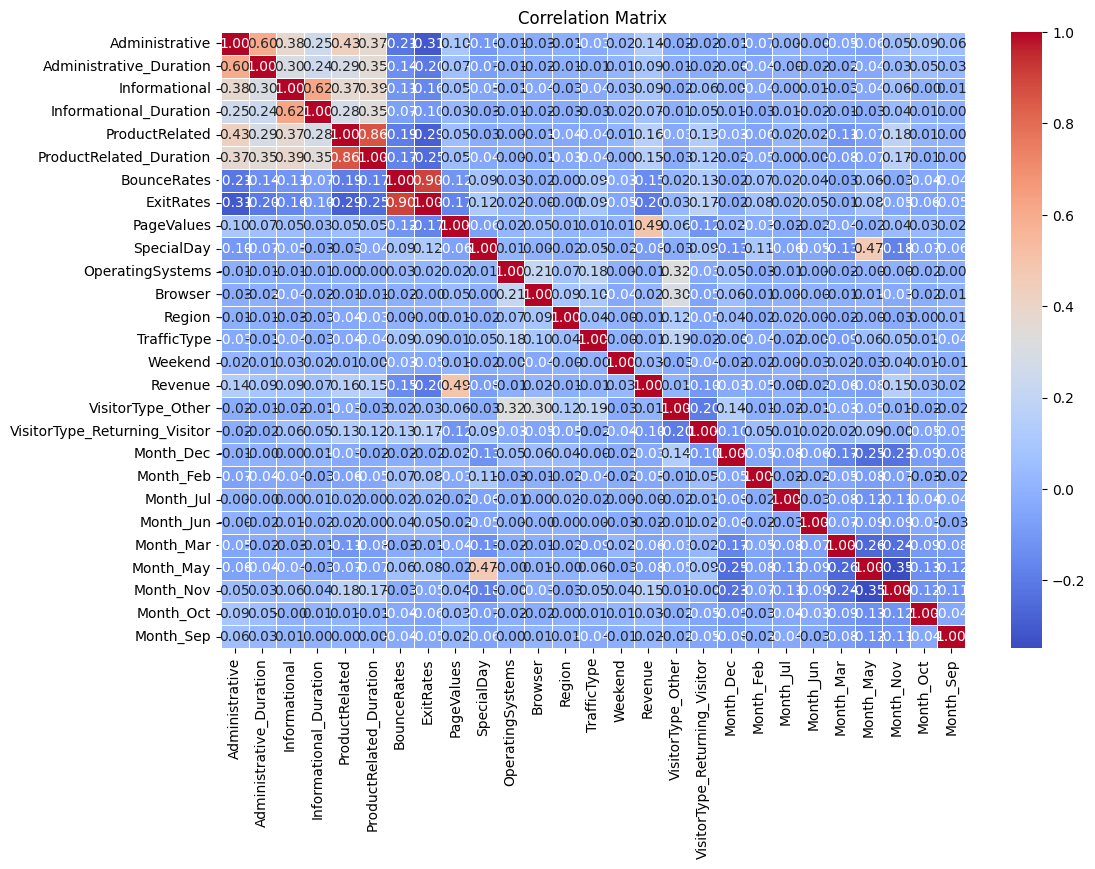

In [39]:
# Calculate correlations
correlation_matrix = data_cleaned.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

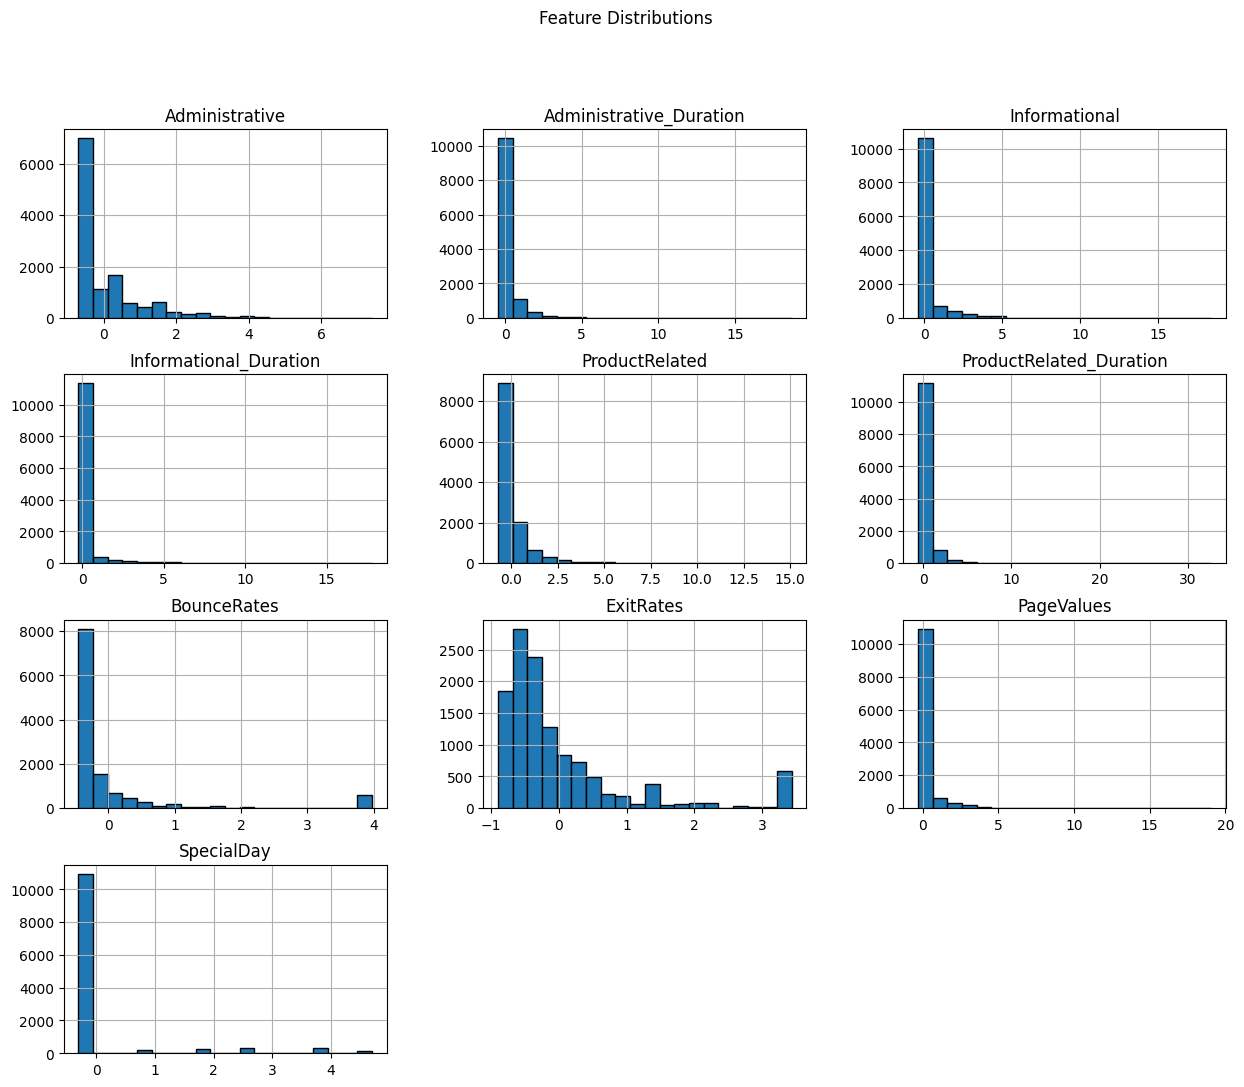

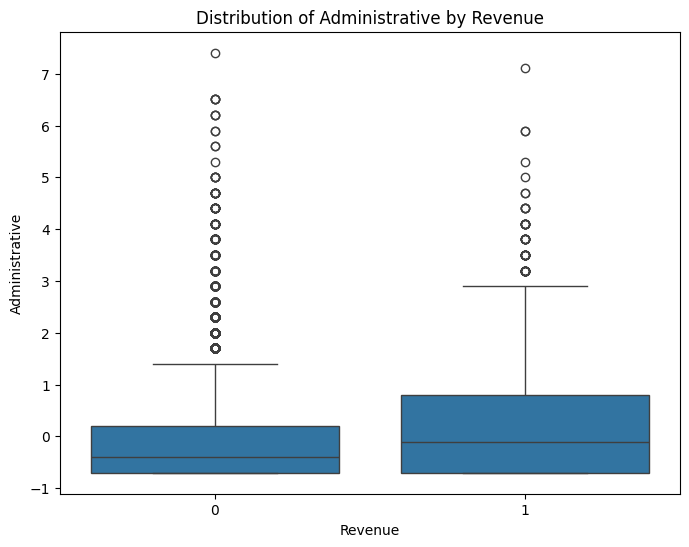

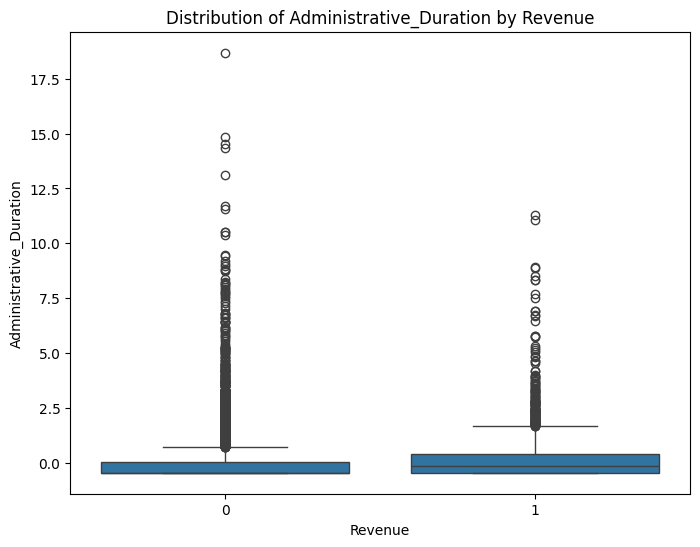

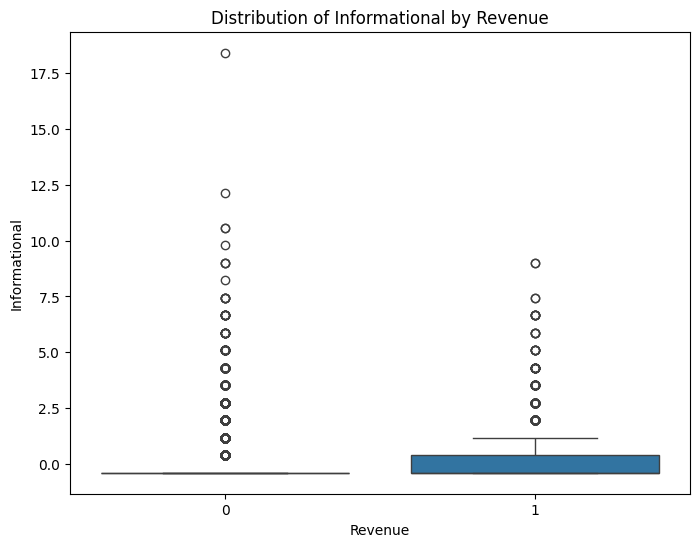

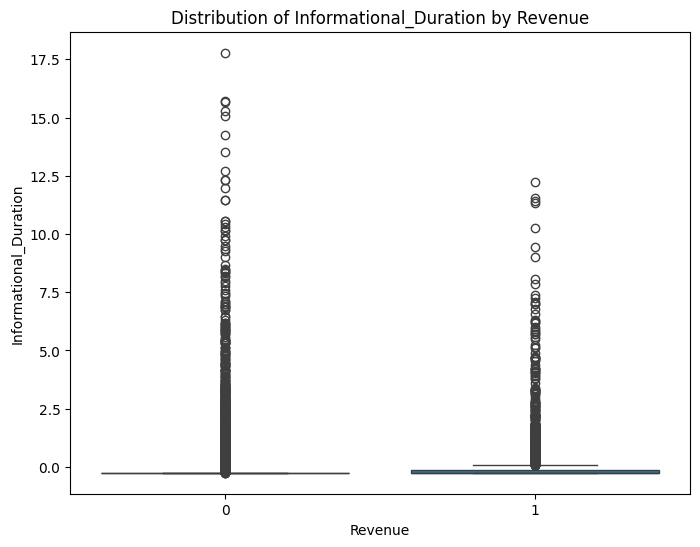

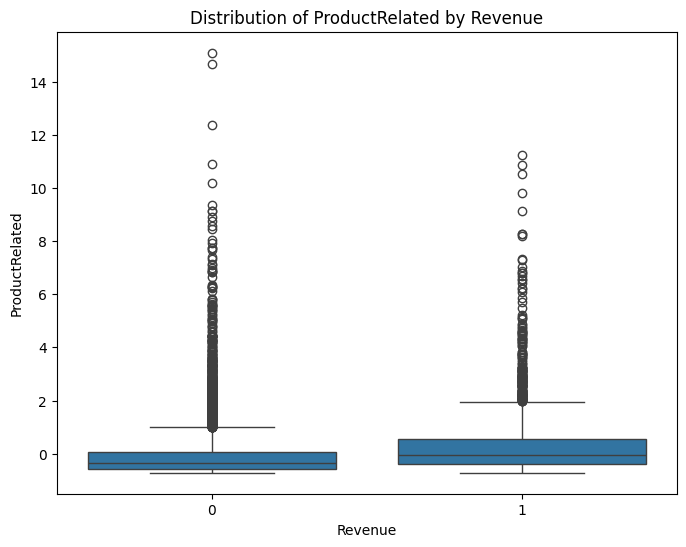

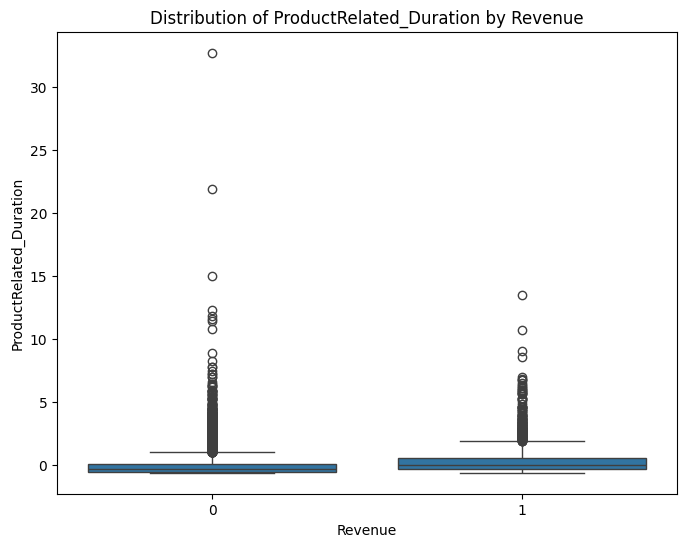

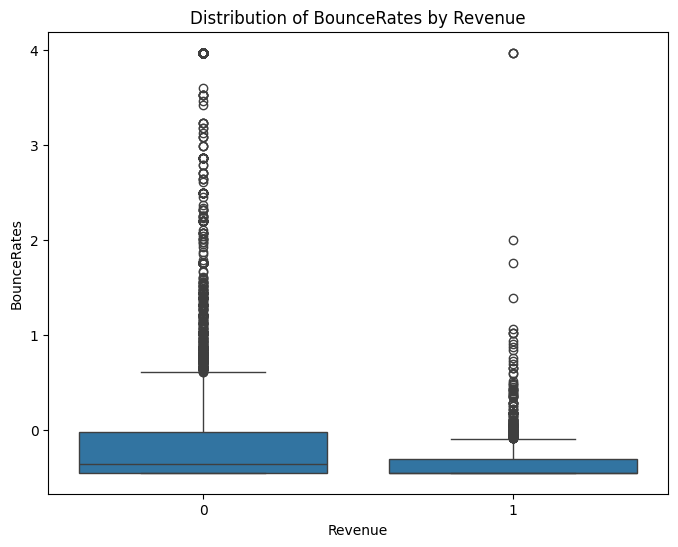

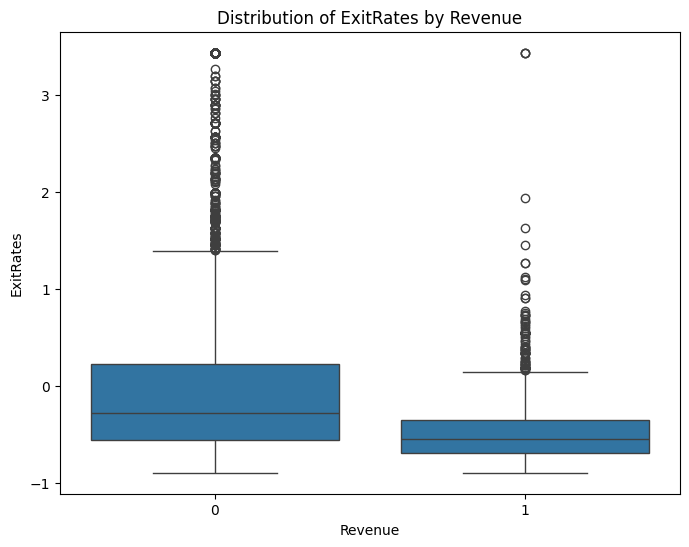

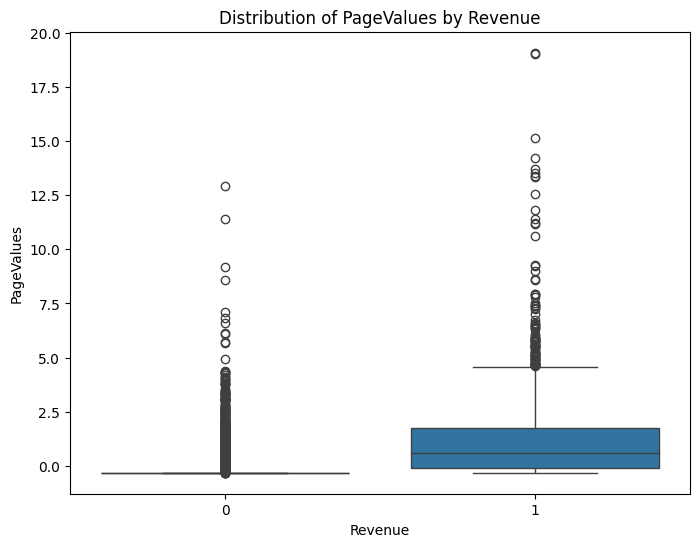

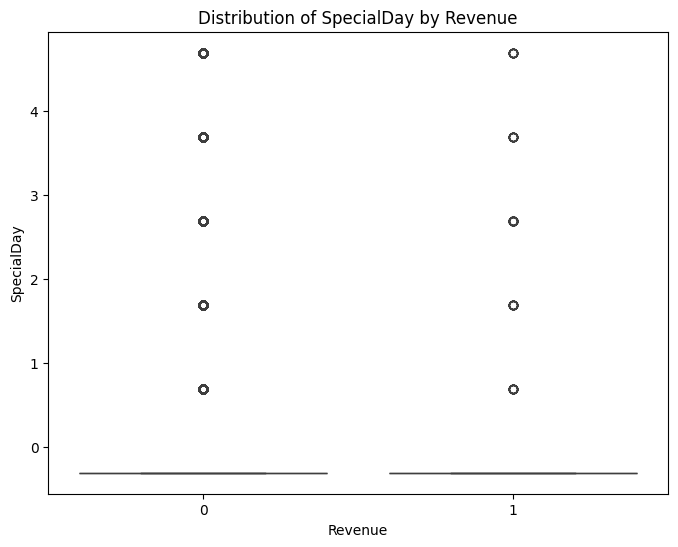

In [40]:
# Plot histograms for numerical features
data_cleaned[numerical_features].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots to compare distributions of numerical features by Revenue
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Revenue', y=feature, data=data_cleaned)
    plt.title(f"Distribution of {feature} by Revenue")
    plt.show()


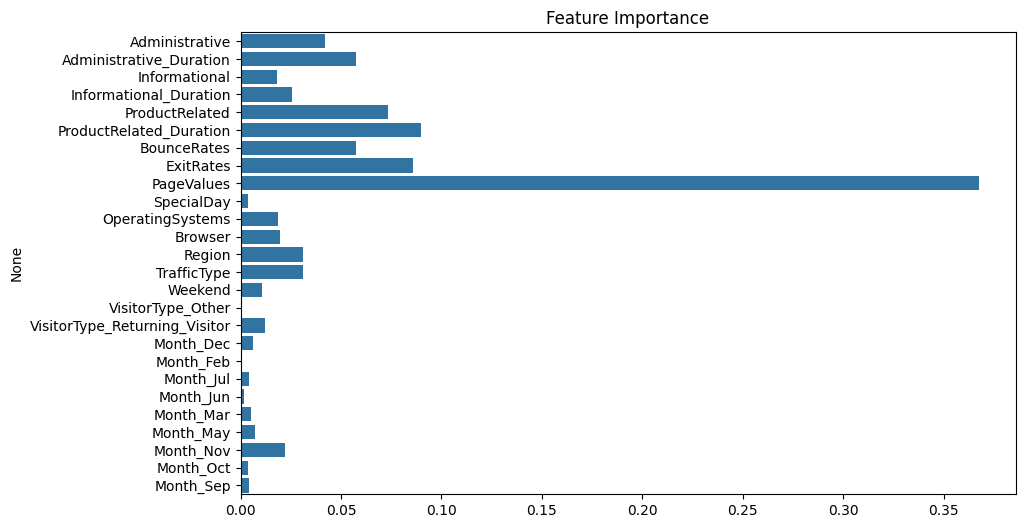

In [41]:
# Define features and target
X = data_cleaned.drop('Revenue', axis=1)
y = data_cleaned['Revenue']

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Plot feature importance
feature_importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance")
plt.show()

In [42]:
# Group by month and calculate the mean of Revenue
monthly_revenue = data_cleaned.groupby('Month').agg({'Revenue': 'mean'}).reset_index()

# Plot the trend of Revenue over months
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Revenue', data=monthly_revenue, marker='o')
plt.title("Trend of Revenue Over Months")
plt.xlabel("Month")
plt.ylabel("Average Revenue")
plt.show()

KeyError: 'Month'

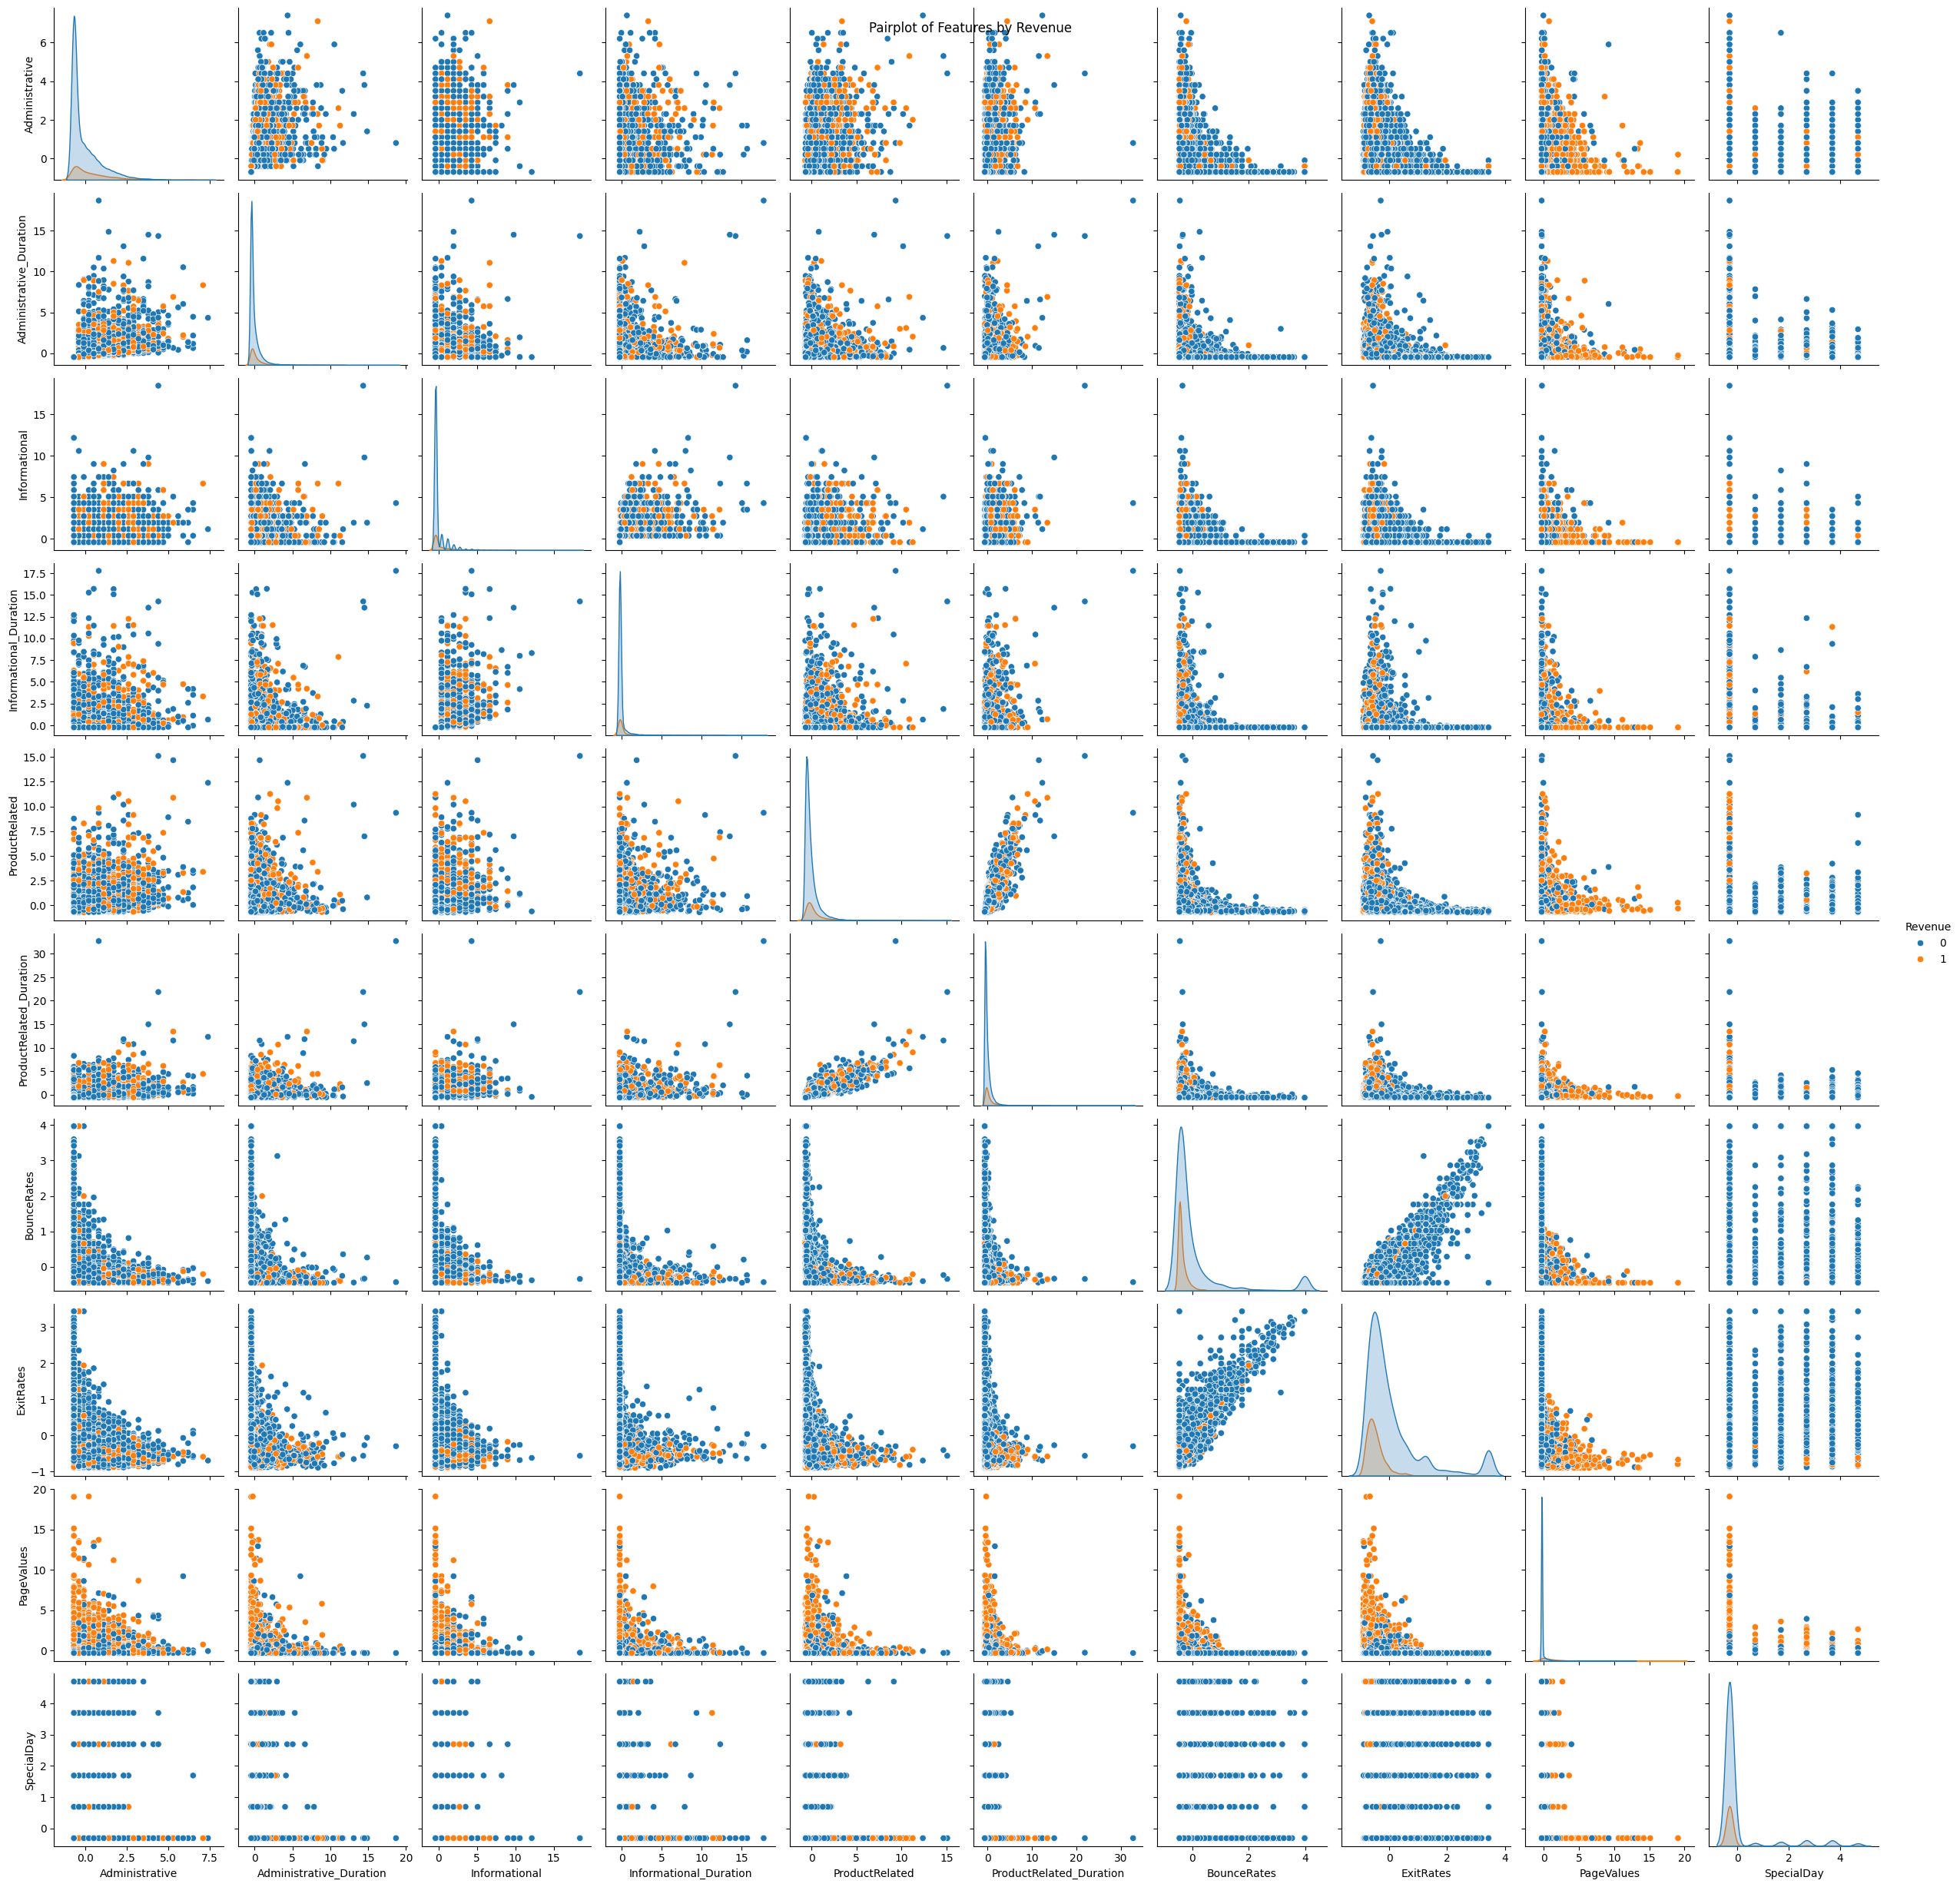

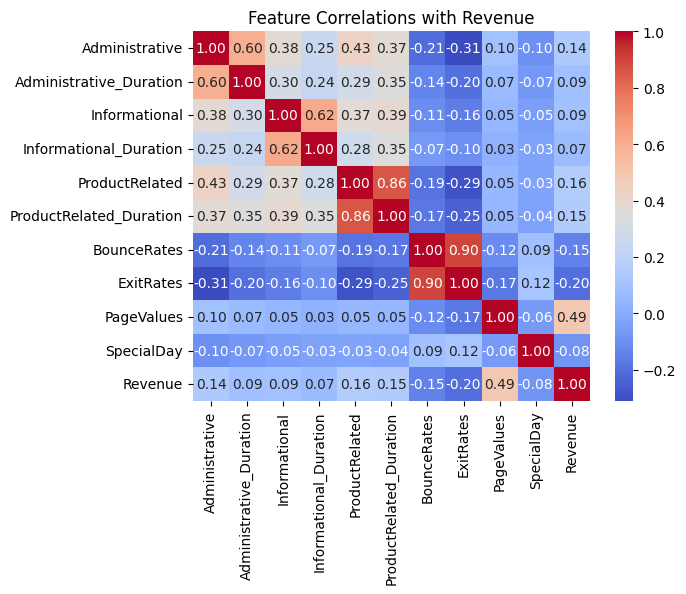

In [43]:
# Pairplot to explore interactions between features and Revenue
sns.pairplot(data_cleaned[numerical_features + ['Revenue']], hue='Revenue')
plt.suptitle("Pairplot of Features by Revenue")
plt.show()

# Heatmap for feature correlations with Revenue
sns.heatmap(data_cleaned[numerical_features + ['Revenue']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations with Revenue")
plt.show()